In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.utils.layer_utils import count_params
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#%matplotlib inline

# Model

In [2]:
import os
os. chdir("C:/Users/samfr/PycharmProjects/upg/datasets")
print(os.getcwd())

C:\Users\samfr\PycharmProjects\upg\datasets


In [3]:
train_path = '/Users/samfr/PycharmProjects/upg/datasets/train'
valid_path = '/Users/samfr/PycharmProjects/upg/datasets/valid'
test_path = '/Users/samfr/PycharmProjects/upg/datasets/test'

In [4]:
train_batches = ImageDataGenerator(rescale=None,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(directory=train_path, 
                            target_size=(224,224), 
                            classes=['COVID-19','NORMAL','Viral_Pneumonia'], 
                            batch_size=10)

Found 2721 images belonging to 3 classes.


In [5]:
valid_batches = ImageDataGenerator(rescale=None,
        rotation_range=20,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True).flow_from_directory(directory=valid_path, 
                            target_size=(224,224), 
                            classes=['COVID-19','NORMAL','Viral_Pneumonia'], 
                            batch_size=10)

Found 583 images belonging to 3 classes.


In [6]:
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224), classes=['COVID-19','NORMAL','Viral_Pneumonia'], batch_size=10)

Found 582 images belonging to 3 classes.


In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
baseModel = DenseNet201(input_shape=[224, 224, 3], include_top=False, weights='imagenet')

# construct the head of the model that will be placed on top of the  the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

filepath = "three_classification_problem_model_solved_densenet201.h5"

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:

# train the head of the network
print("[INFO] training head...")
results = model.fit_generator(generator=train_batches, steps_per_epoch=4,
                    validation_data=valid_batches, validation_steps=4, epochs=50, verbose=2, callbacks = callbacks_list)

#model.save('three_classification_problem_model_solved_densenet201.h5')

[INFO] training head...


C:\Users\samfr\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
4/4 - 48s - loss: 1.5974 - accuracy: 0.3500 - val_loss: 1.0458 - val_accuracy: 0.5750

Epoch 00001: val_accuracy improved from -inf to 0.57500, saving model to three_classification_problem_model_solved_densenet201.h5
Epoch 2/50
4/4 - 23s - loss: 1.5483 - accuracy: 0.4750 - val_loss: 1.1710 - val_accuracy: 0.6250

Epoch 00002: val_accuracy improved from 0.57500 to 0.62500, saving model to three_classification_problem_model_solved_densenet201.h5
Epoch 3/50
4/4 - 17s - loss: 1.6079 - accuracy: 0.5000 - val_loss: 1.0465 - val_accuracy: 0.6500

Epoch 00003: val_accuracy improved from 0.62500 to 0.65000, saving model to three_classification_problem_model_solved_densenet201.h5
Epoch 4/50
4/4 - 17s - loss: 1.2415 - accuracy: 0.5000 - val_loss: 0.6528 - val_accuracy: 0.7500

Epoch 00004: val_accuracy improved from 0.65000 to 0.75000, saving model to three_classification_problem_model_solved_densenet201.h5
Epoch 5/50
4/4 - 17s - loss: 1.2043 - accuracy: 0.5750 - val_loss: 0.6006 - val

4/4 - 17s - loss: 0.4164 - accuracy: 0.8000 - val_loss: 0.6701 - val_accuracy: 0.8000

Epoch 00049: val_accuracy did not improve from 0.95000
Epoch 50/50
4/4 - 17s - loss: 0.7164 - accuracy: 0.8750 - val_loss: 0.3097 - val_accuracy: 0.9000

Epoch 00050: val_accuracy did not improve from 0.95000


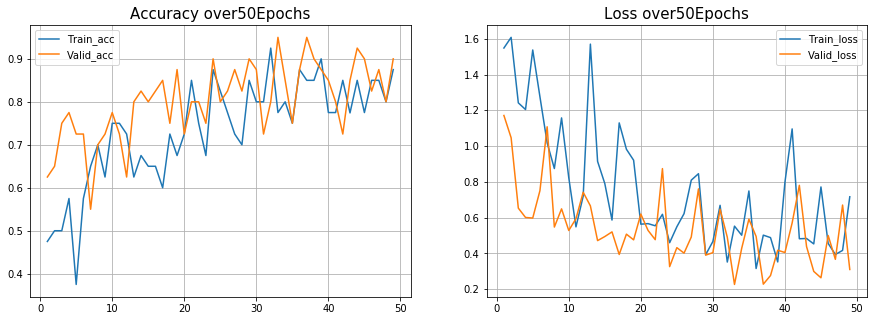

In [11]:
import matplotlib.pyplot as plt
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']
 val_acc = results.history['val_accuracy']
 val_loss = results.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Valid_acc')
 plt.title('Accuracy over' + str(epochs) + 'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Valid_loss')
 plt.title('Loss over' + str(epochs) +  'Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(results, 50)

# Let's create the Confusion Matrix

In [12]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
from keras.preprocessing.image import img_to_array, load_img

In [13]:
# images folder
covid_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\valid\\COVID-19'
normal_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\valid\\NORMAL'
pneumonia_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\valid\\Viral_Pneumonia'

# path to model
model_path = '/Users/samfr/PycharmProjects/upg/datasets/three_classification_problem_model_solved_densenet201.h5'

# dimensions of images
img_width, img_height = 224, 224

# load the trained model
model_loaded = load_model(model_path)
model_loaded.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#######################################################
## COVID-19
# load all images into a list
images_covid = []
for img in os.listdir(covid_path):
    img = os.path.join(covid_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_covid.append(img)
    
    # stack up images list to pass for prediction
images_covid = np.vstack(images_covid)
covid_pred = model_loaded.predict(images_covid, batch_size=10)
covid_pred = np.argmax(covid_pred,axis=1)
covid_len = (len(list(covid_pred)))
covid_len

180

In [15]:
##########################################################
##  NORMAL
# load all images into a list
images_normal = []
for img in os.listdir(normal_path):
    img = os.path.join(normal_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_normal.append(img)
    
    # stack up images list to pass for prediction
images_normal = np.vstack(images_normal)
normal_pred = model_loaded.predict(images_normal, batch_size=10)
normal_pred = np.argmax(normal_pred,axis=1)
normal_len = (len(list(normal_pred)))
normal_len

201

In [16]:
############################################################
## Pneumonia
# load all images into a list
images_pneumonia = []
for img in os.listdir(pneumonia_path):
    img = os.path.join(pneumonia_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images_pneumonia.append(img)
    
    # stack up images list to pass for prediction
images_pneumonia = np.vstack(images_pneumonia)
pneumonia_pred = model_loaded.predict(images_pneumonia, batch_size=10)
pneumonia_pred = np.argmax(pneumonia_pred,axis=1)
pneumonia_len = (len(list(pneumonia_pred)))
pneumonia_len

202

In [17]:
covid_true = np.zeros((covid_len,), dtype=int)
normal_true = np.ones((normal_len,), dtype=int)
pneumonia_true = 2*np.ones((pneumonia_len,), dtype=int)

In [18]:
type(pneumonia_true)

numpy.ndarray

In [19]:
type(pneumonia_pred)

numpy.ndarray

In [20]:
pred_concat = np.concatenate((covid_pred, normal_pred,pneumonia_pred), axis=0)

In [21]:
true_concat = np.concatenate((covid_true, normal_true,pneumonia_true), axis=0)

In [22]:
import sklearn.metrics as metrics

confusion_matrix(true_concat, pred_concat)
print('Classification Report')
target_names = ['COVID-19','NORMAL','Viral_Pneumonia']
print(metrics.classification_report(true_concat, pred_concat, target_names=target_names))

Classification Report
                 precision    recall  f1-score   support

       COVID-19       0.98      0.59      0.74       180
         NORMAL       0.72      0.67      0.69       201
Viral_Pneumonia       0.57      0.81      0.67       202

       accuracy                           0.69       583
      macro avg       0.76      0.69      0.70       583
   weighted avg       0.75      0.69      0.70       583



## Let's plot ROC & AUC

In [23]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score


all_labels = ['COVID-19','NORMAL','Viral_Pneumonia']

y_test = true_concat
y_pred = pred_concat

0.7677396128615236

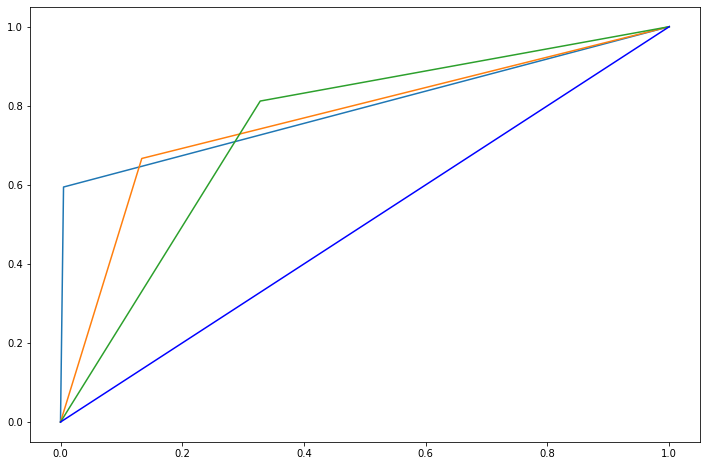

In [24]:
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(all_labels): # all_labels: no of the labels, for ex. ['cat', 'dog', 'rat']
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

# calling
#true_concat.reset() # resetting generator
# y_pred = model.predict_generator(y_test, verbose = True)
# y_pred = np.argmax(y_pred, axis=1)
multiclass_roc_auc_score(y_test, y_pred)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#from plot_conf_matr import plot_confusion_matrix

In [26]:
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, figname,normalize=False,title="Confusion matrix",cmap=plt.cm.Blues):
    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix")
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.tight_layout()
        plt.savefig(figname)
    


Confusion matrix


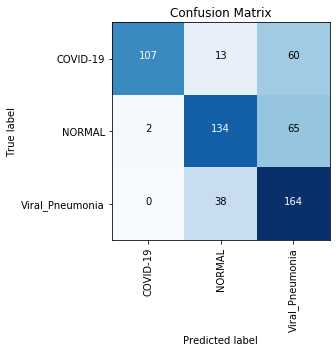

In [27]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['COVID-19','NORMAL','Viral_Pneumonia'], title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete.jpg')

# Prediction

Test Dataset has been kept untouched and used below to test model performance on unseen data

## Covid-19 Prediction Accuracy

In [28]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

In [29]:
# image folder
covid_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\test\\COVID-19'
# path to model
model = model_loaded

# dimensions of images
img_width, img_height = 224, 224

# load all images into a list
images = []
for img in os.listdir(covid_path):
    img = os.path.join(covid_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    

In [30]:
# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print(classes)

[2 2 1 1 1 2 0 1 2 1 0 1 2 2 2 0 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 1 0 2 1
 0 0 2 2 2 0 0 1 1 2 1 1 2 0 0 0 0 2 0 0 1 1 0 2 0 0 2 0 0 2 0 2 1 2 0 2 0
 0 2 0 2 2 0 2 0 1 0 0 1 1 1 0 0 2 2 0 0 0 2 2 1 2 0 0 1 0 0 0 0 0 2 2 0 1
 0 0 1 0 0 0 2 1 1 1 2 1 0 2 2 0 2 0 2 2 0 2 0 0 1 2 0 2 2 2 0 1]


In [31]:
# Let's convert it to List
pred_counter = list(classes)
print(pred_counter)

[2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1]


In [32]:
# Let's check the accuracy od Covid-19

from collections import Counter

covid_occurance= Counter(pred_counter)[0]
covid_pred_accuracy = (covid_occurance/len(pred_counter))*100

print(covid_pred_accuracy)

54.44444444444444


## Normal Prediction Accuracy

In [33]:
# image folder
normal_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\test\\NORMAL'
# path to model
# path to model
model = model_loaded

# dimensions of images
img_width, img_height = 224, 224

# load all images into a list
images = []
for img in os.listdir(normal_path):
    img = os.path.join(normal_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
    # stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print(classes)

[1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 2 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 2 2 2 1 1 2 1 1 1
 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2
 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2
 2 2 2 1 2 1 2 1 1 2 2 2 2 2 1 1]


In [34]:
# Let's convert it to List
pred_counter = list(classes)
print(pred_counter)

[1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1]


In [35]:
# Let's check the accuracy of Normal patients

from collections import Counter

normal_occurance = Counter(pred_counter)[1]
normal_pred_accuracy = (normal_occurance/len(pred_counter))*100

print(normal_pred_accuracy)

74.12935323383084


## Viral Pneumonia Prediction Accuracy

In [36]:
# image folder
pneumonia_path = 'C:\\Users\\samfr\\PycharmProjects\\upg\\datasets\\test\\Viral_Pneumonia'
# path to model
# path to model
model = model_loaded

# dimensions of images
img_width, img_height = 224, 224

# load all images into a list
images = []
for img in os.listdir(pneumonia_path):
    img = os.path.join(pneumonia_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)
    
    # stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=10)
classes = np.argmax(classes,axis=1)
print(classes)

[2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 2 2 2 2 1 2 2 2 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 1 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 1 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 1 2 1 1 1 2 2]


In [37]:
# Let's convert it to List
pred_counter = list(classes)
print(pred_counter)

[2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2]


In [38]:
# Let's check the accuracy of Viral Pneumonia

from collections import Counter

pneumonia_occurance = Counter(pred_counter)[2]
pneumonia_pred_accuracy = (pneumonia_occurance/len(pred_counter))*100

print(pneumonia_pred_accuracy)

78.1094527363184
